In [33]:
print("Exploratory Analysis with Linear Regressions")


Exploratory Analysis with Linear Regressions


# Exploratory Analysis with Linear Regressions

## Load the data you receive into a Pandas DataFrame

In [34]:
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split


## Columns

- **age**: age of primary beneficiary


- **sex**: insurance contractor gender, female, male


- **bmi**: Body mass index, providing an understanding of body, weights that are relatively high or low relative to height,
objective index of body weight (kg / m ^ 2) using the ratio of height to weight, ideally 18.5 to 24.9


- **children**: Number of children covered by health insurance / Number of dependents


- **smoker**: Smoking


- **region**: the beneficiary's residential area in the US, northeast, southeast, southwest, northwest.


- **charges**: Individual medical costs billed by health insurance

In [35]:
data_frame = pd.read_csv('insurance.csv')
data_frame


,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


## Show the first five rows of the data set.


In [36]:
data_frame.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


## Show the description and the info of the data set.


In [37]:
data_frame.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [38]:
data_frame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


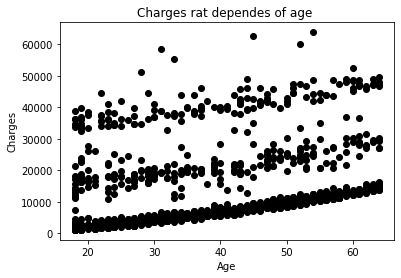

In [39]:
%matplotlib inline
plt.scatter(data_frame["age"], data_frame["charges"], color='black')
plt.xlabel('Age')
plt.ylabel('Charges')
plt.title('Charges rat dependes of age ')
plt.show()


## Using a regression model, split your data into train and test data.


In [40]:

#Selecting Corresponding Features
X = data_frame['age'].values
y = data_frame['charges'].values
X


array([19, 18, 28, ..., 18, 21, 61])

In [41]:
# create a column vector
X = X.reshape(-1, 1)
X


array([[19],
       [18],
       [28],
       ...,
       [18],
       [21],
       [61]])

In [42]:
y = y.reshape(-1, 1)
y

array([[16884.924 ],
       [ 1725.5523],
       [ 4449.462 ],
       ...,
       [ 1629.8335],
       [ 2007.945 ],
       [29141.3603]])

In [43]:
x_train, x_test, y_train, y_test = train_test_split(X, y, train_size=0.8, test_size=0.2, random_state=100)
print(f"X_train shape {x_train.shape}")
print(f"y_train shape {y_train.shape}")
print(f"X_test shape {x_test.shape}")
print(f"y_test shape {y_test.shape}")



X_train shape (1070, 1)
y_train shape (1070, 1)
X_test shape (268, 1)
y_test shape (268, 1)


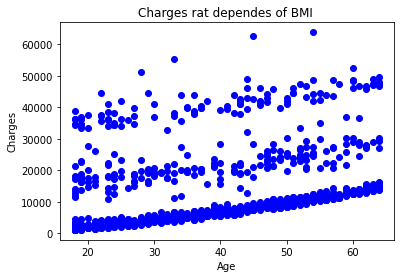

In [44]:
%matplotlib inline
plt.scatter(x_train, y_train, color='blue')
plt.xlabel('Age')
plt.ylabel('Charges')
plt.title('Charges rat dependes of BMI ')
plt.show()


In [45]:
data_frame[["age","charges"]].corr()

,age,charges
age,1.000000,0.299008
charges,0.299008,1.000000


## Fit your training split to the regression model.


In [46]:
lm = LinearRegression()
lm.fit(x_train, y_train)
y_predict = lm.predict(x_test)

## Show your regression model’s score.


In [47]:
print(f"Train accuracy {round(lm.score(x_train,y_train)*100,2)} %")
print(f"Test accuracy {round(lm.score(x_test,y_test)*100,2)} %")


Train accuracy 10.51 %
Test accuracy 2.38 %


## We conclude from this experience that there is no significant correlation between BMI  and the charges of health insurance.
## As there are differences for each age group in terms of the order of health insurance.
## A large proportion of health insurance holders are non-smokers.